# Matplotlib & Seaborn

Juan G. Marinero Tarazona

Based on: [VanderPlas book](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
from IPython.display import display_html

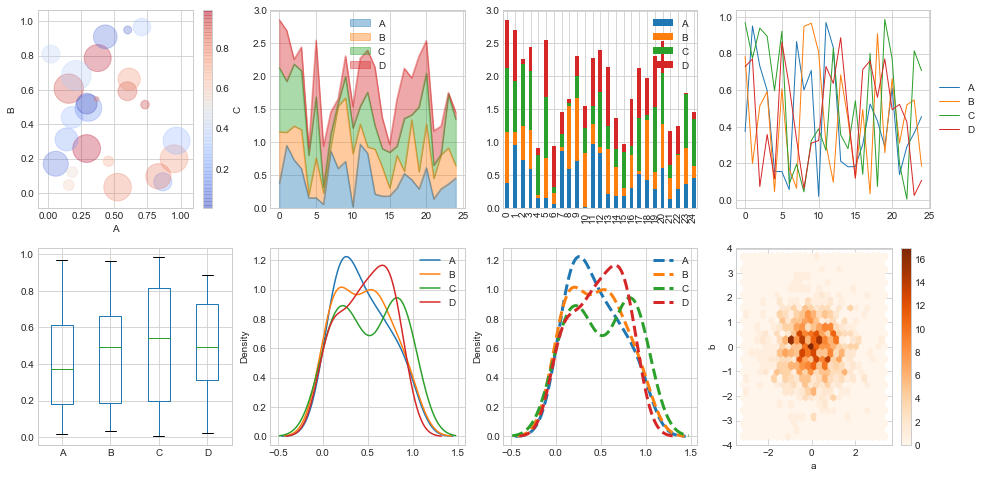

In [2]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'A': rng.rand(25),
                   'B': rng.rand(25),
                   'C': rng.rand(25),
                   'D': rng.rand(25)})

fig, ax = plt.subplots(2, 4, figsize=(16,8))
df.plot(kind='scatter', x='A', y='B',c='C', s=1e3*df['D'], cmap='coolwarm', alpha=0.3, ax=ax[0,0])
df.plot.area(alpha=0.4, ax=ax[0,1])
df.plot.bar(stacked=True, ax=ax[0,2])
df.plot.line(x=None,y=['A','B','C','D'],lw=1, ax=ax[0,3])
ax[0,3].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
df.plot.box(ax=ax[1,0])
df.plot.kde(ax=ax[1,1])
df.plot.density(lw=3,ls='--', ax=ax[1,2])

df_hexbin = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df_hexbin.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges', ax=ax[1,3]);

# Customizing Plot Legends

### location

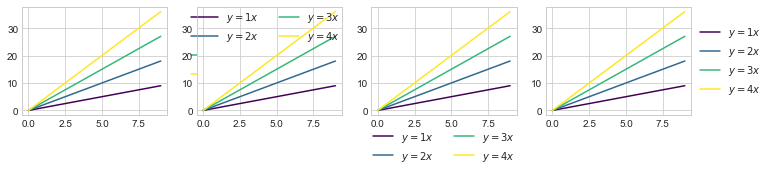

In [3]:
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.style.use('seaborn-whitegrid')
x = np.arange(10)
legend_str = ["bbox_to_anchor=(1.1, 1.05)",
             "loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=2, fancybox=True, shadow=True",
            "loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=2",
             "loc='center left', bbox_to_anchor=(1, 0.5)"
             ]
N = len(legend_str) # number of subplots
n = 4 # 4 curves per subplot
cmap = plt.get_cmap('viridis'); colors = [cmap(i) for i in np.linspace(0, 1, n)]
fig, ax = plt.subplots(1,N, figsize=(12,2))
for index,k in enumerate(ax):
    for i, color in enumerate(colors, start=1): k.plot(x, i * x, color=color, label='$y = %ix$' % i)
    eval('k.legend(' + legend_str[index] +')')

## Customizing Colorbars



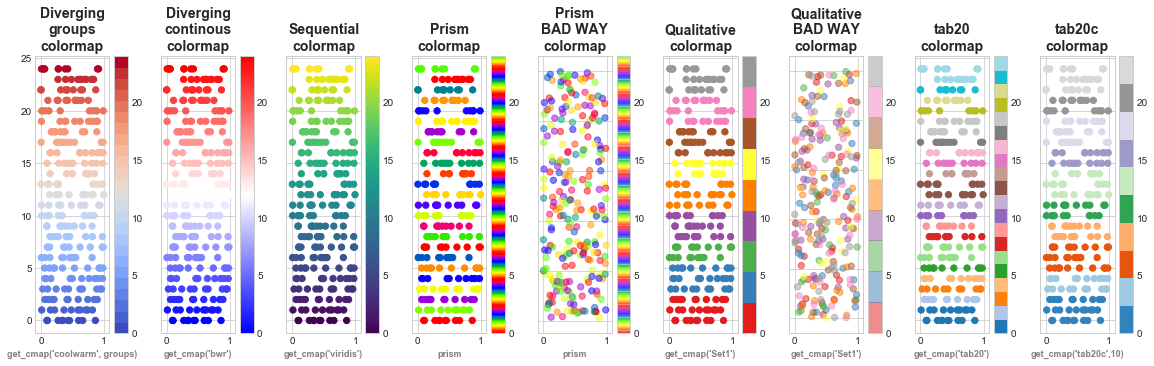

In [4]:
# https://matplotlib.org/examples/color/colormaps_reference.html

groups = 25;
N = 10*groups
X = np.random.random(N)
y = np.r_[[i*np.ones(N//groups) for i in range(groups)]]
c = tuple(y.reshape(1, -1)[0])

fig = plt.figure(figsize=(16,5))
dic01 = {'Diverging\ngroups':        "plt.cm.get_cmap('coolwarm', groups)",
             'Diverging\ncontinous': "plt.cm.get_cmap('bwr')", 
             'Sequential':           "plt.cm.get_cmap('viridis')",
             'Prism':                "plt.cm.prism",
             'Prism\nBAD WAY':       "plt.cm.prism", 
             'Qualitative':          "plt.cm.get_cmap('Set1')", # it does not accept groups variable
             'Qualitative\nBAD WAY': "plt.cm.get_cmap('Set1')",
             'tab20':                "plt.cm.get_cmap('tab20')",
             'tab20c':               "plt.cm.get_cmap('tab20c',10)" # only 10 different colors (arbitrary)
        }
str_title = list(dic01.keys());
cmap_str = list(dic01.values());
cmap = [];
for k in cmap_str: cmap.append(eval(k));
subplots = len(str_title)
for k in range(subplots):
    ax = fig.add_subplot(1, subplots, k+1)
    if ('BAD WAY' not in str_title[k]): img = ax.scatter(X, y, s=40, c=c, cmap=cmap[k])
    else:                               img = ax.scatter(X, np.random.random(N), s=40, c=c, cmap=cmap[k], alpha=.5)
    plt.title(str_title[k] + '\ncolormap', fontsize=14, fontweight='bold')
    plt.xlabel(cmap_str[k][7:], fontsize=9, fontweight='bold', color='grey')
    if k>0: plt.setp(ax.get_yticklabels(), visible=False);
    fig.colorbar(img)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

'''
Notes: for classification algorithms (like clustering) use either:
1- plt.cm.get_cmap('coolwarm', groups) # 'coolwarm' or other diverging/sequential, because:
 -the groups variable should be the integer of numbers of spllited colors
2-Prism colormap because:
 -it is NOT sequential, thus different categories have high color contrast (even if they are close inbetween)
 -it does not overlap categories like the groups (=25) in Qualitative colormap plot, where there are only 9 colors

Possible disadvantage (see plot Prism\nBAD WAY) is the overlap of groups: 
if data is not classificated or 
if because of large quantity of groups some distincs groups find close to others with same assigned color (imagine 3D)
''';

# Multiple Subplots

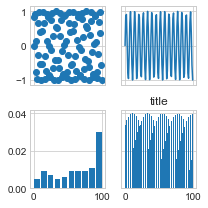

In [5]:
# fig, ax = plt.subplots

# copy-paste !!!

x = np.array(range(100))
y = np.sin(x)

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(3,3))

ax[0,0].scatter(x,y)
ax[0,1].plot(x,y) # or plt.plot(x,y,ax=ax[0,1])
ax[1,0].hist(abs(y)*1e2, bins=10, density=True, histtype='bar', rwidth=0.8)
ax[1,1].bar(x,abs(y)/25)

ax[1,1].set_title('title')

# change every ax with either way:
# · After plots:
#     for axi in ax.flat: axi.xticks=[];
# · subplot_kw in plt.subplots()
#     fig, ax = plt.subplots([...], subplot_kw=dict(xticks=[]))

plt.tight_layout()
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

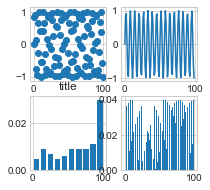

In [6]:
# add_subplot() 
# usefull when a function defines a plot

# copy-paste !!!

x = np.array(range(100))
y = np.sin(x)

def plotFcn(): plt.hist(abs(y)*1e2, bins=10, density=True, histtype='bar', rwidth=0.8)
    
fig = plt.figure(figsize=(3, 3))

fig.add_subplot(221) # Alternative would be add_subplot(2, 2, 2). E.g. "234" means "2x3 grid, 4th subplot"
plt.scatter(x,y)
fig.add_subplot(222)
plt.plot(x,y)
fig.add_subplot(223)
plotFcn()
plt.title('title')
fig.add_subplot(224)
plt.bar(x,abs(y)/25);

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands:

- ``plt.xlabel()`` → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``   &nbsp;&emsp;→ ``ax.set_xlim()``
- ``plt.ylim()``   &nbsp;&emsp;→ ``ax.set_ylim()``
- ``plt.title()``  &nbsp;&nbsp;&nbsp;→ ``ax.set_title()``

#### 3D plots as subplots

https://matplotlib.org/gallery/mplot3d/subplot3d.html

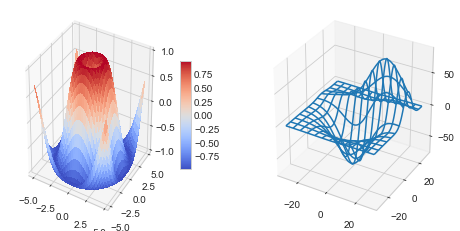

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

#### seaborn as subplots

Clustermap, as some other seaborn (sns) functions, creates its own figure. There is nothing you can do about that but as long as all other content you want to have in the final figure can be created inside axes, like in this case the boxplot, the solution is relatively easy.

You can simply work with the figure that clustermap has created for you. The idea would then be to manipulate the gridspec of the axes such that there is some place left for the other axes. 
[https://stackoverflow.com/questions/51811972/adding-seaborn-clustermap-to-figure-with-other-plots/51813562]

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

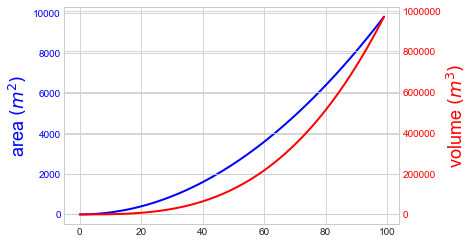

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Other 2D plot styles

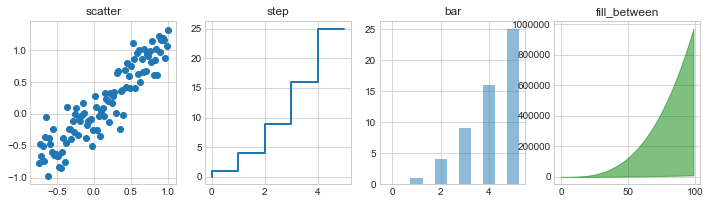

In [9]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

# Seaborn

## Copy-paste summary Seaborn:

Plot: 1


/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


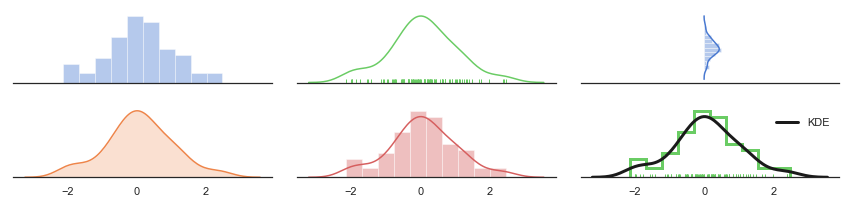

Plot: 2


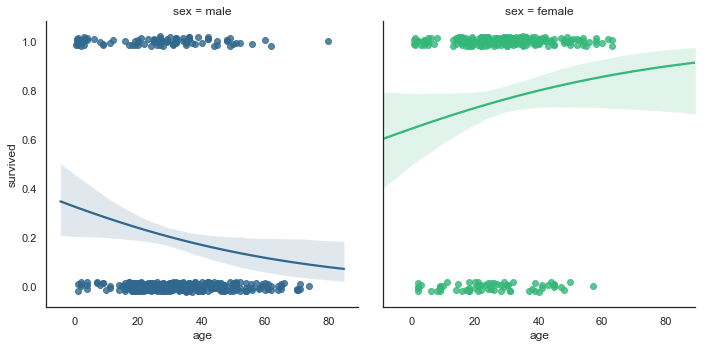

Plot: 3


/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


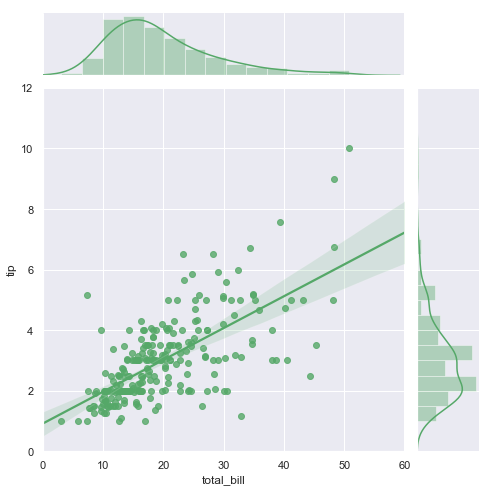

Plot: 4


<Figure size 288x216 with 0 Axes>

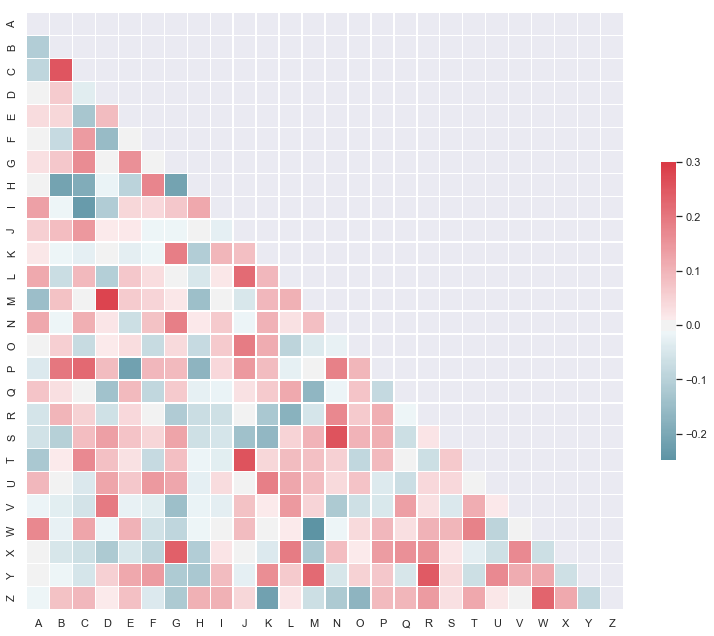

In [10]:
sns.set(style="white", palette="muted")

# several distribution plot examples
i = 1;
print(f"Plot: {i}")
f, axes = plt.subplots(2, 3, figsize=(12, 3), sharex=True)
sns.despine(left=True)
rs = np.random.RandomState(10)
b, g, r, p = sns.color_palette("muted", 4)
d = rs.normal(size=100)
sns.distplot(d, kde=False, color=b, ax=axes[0, 0])
sns.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sns.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color=p, ax=axes[1, 1])
sns.distplot(d, vertical=True, ax=axes[0,2])
sns.distplot(d, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
            ax=axes[1, 2])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# faceted logistic regression
i += 1;
print(f"Plot: {i}")
df = sns.load_dataset("titanic")
sns.lmplot("age", "survived", col="sex", hue="sex", data=df,
               palette='viridis', y_jitter=.02, logistic=True)
plt.show()

# linear regression with marginal distributions
# and much more: https://seaborn.pydata.org/generated/seaborn.jointplot.html
i += 1;
print(f"Plot: {i}")
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
color = sns.color_palette()[2]
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, size=7)
plt.show()

# correlation matrix
i += 1;
print(f"Plot: {i}")
plt.figure(figsize=(4,3))
# Generate a large random dataset
from string import ascii_letters
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))
# Compute the correlation matrix
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.tight_layout()
plt.show()

## sns & plt.subplots

https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface

The plotting functions in seaborn are broadly divided into two classes

- **Axes-level** functions, including regplot, boxplot, kdeplot, and many others
- **Figure-level** functions, including lmplot, factorplot, jointplot and few others

The 1st group is identified by taking an explicit ax argument and returning an Axes object. E.g.:

``f, ax = plt.subplots(2)
sns.regplot(x, y, ax=ax[0])
sns.kdeplot(x, ax=ax[1])``

**Axes-level** functions will only draw onto an Axes and won't otherwise mess with the figure, so they can coexist perfectly happily in an object-oriented matplotlib script.

**Figure-level** functions are distinguished by the fact that the resulting plot can potentially include several Axes which are always organized in a "meaningful" way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an lmplot onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing.

However, once you've called lmplot, it will return an object of the type FacetGrid. This object has some methods for operating on the resulting plot that know a bit about the structure of the plot. It also exposes the underlying figure and array of axes at the FacetGrid.fig and FacetGrid.axes arguments. The jointplot function is very similar, but it uses a JointGrid object. So you can still use these functions in an object-oriented context, but all of your customization has to come after you've called the function. 

Summary, with **Figure-level** functions it is also posible to create pseudo-plt.subplots, but it is much much harder, read:<br> 
https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot<br> 
https://stackoverflow.com/questions/51811972/adding-seaborn-clustermap-to-figure-with-other-plots/51813562

## sns Style and Color

<!--NAVIGATION-->
[StyleandColor.ipynb](../../udemy_PythonforDataScienceandMachineLearningBootcamp/Python-for-Data-Visualization/Seaborn/Style%20and%20Color.ipynb) and [video](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733312?start=0)


### PairGrid

It is a subplot grid for plotting pairwise relationships in a dataset.

Recommended: https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial

/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'marker'
  s)
/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'marker'
  s)
/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by cont

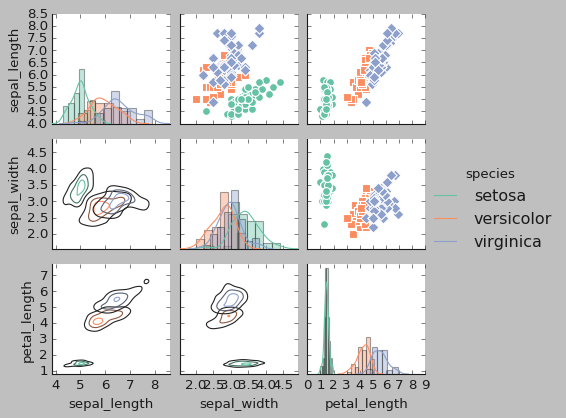

In [11]:
iris = sns.load_dataset('iris'); # print(iris.head())
plt.style.use('classic');

# sns.PairGrid(iris); # Just the Grid 

# map to the grid
g = sns.PairGrid(iris,
                 vars=["sepal_length", "sepal_width", "petal_length"],
                 hue="species", 
                 palette="Set2",
                 hue_kws={"marker": ["o", "s", "D"]},
                 height=3,
                 aspect=2)

#g.map()         # plot type of          all      subplots
#g.map_offdiag() # plot type of          diagonal subplots
#g.map_diag()    # plot type of       NO diagonal subplots
#g.map_upper()   # plot type of upper of diagonal subplots
#g.map_lower()   # plot type of lower of diagonal subplots
    
#g.map_diag(plt.hist)
g.map_diag(sns.distplot)
#g.map_diag(sns.kdeplot)

g.map_upper(plt.scatter, s=50, edgecolor="white")
g.map_lower(sns.kdeplot,n_levels=3)
#g.map_lower(sns.kdeplot,n_levels=3, bw=.15, cut=0,shade=True, shade_lowest=False,alpha=.8)
#g.map_lower(sns.violinplot)
#g.map_lower(sns.regplot)
#g.map_lower(sns.distplot) # error, only in diag
#g.map_lower(sns.regplot)
#g.map_lower()

g.fig.set_size_inches(5,5)
g.add_legend();

### violinplot

/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


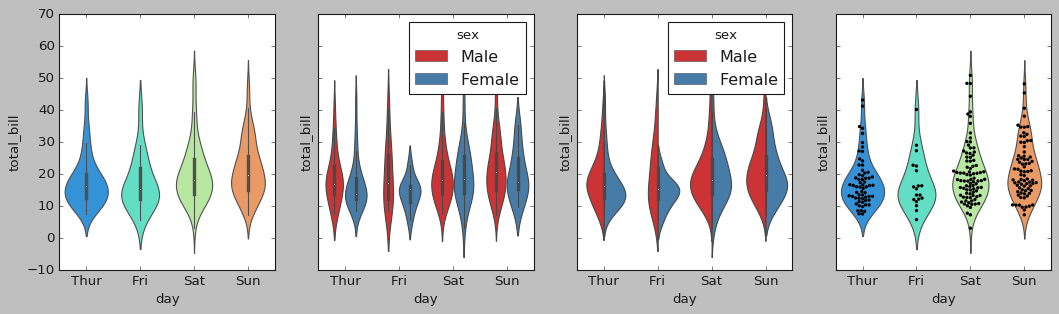

In [12]:
tips = sns.load_dataset('tips'); # print(tips.head())

fig, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(16, 4))

sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow', ax=ax[0])
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1', ax=ax[1])
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1', ax=ax[2])

# violinplot + swarmplot:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow', inner=None, ax=ax[3]) # violinplot --> KDE
sns.swarmplot(x="day", y="total_bill", data=tips,color='black',size=3, ax=ax[3]);

### stripplot and swarmplot

/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


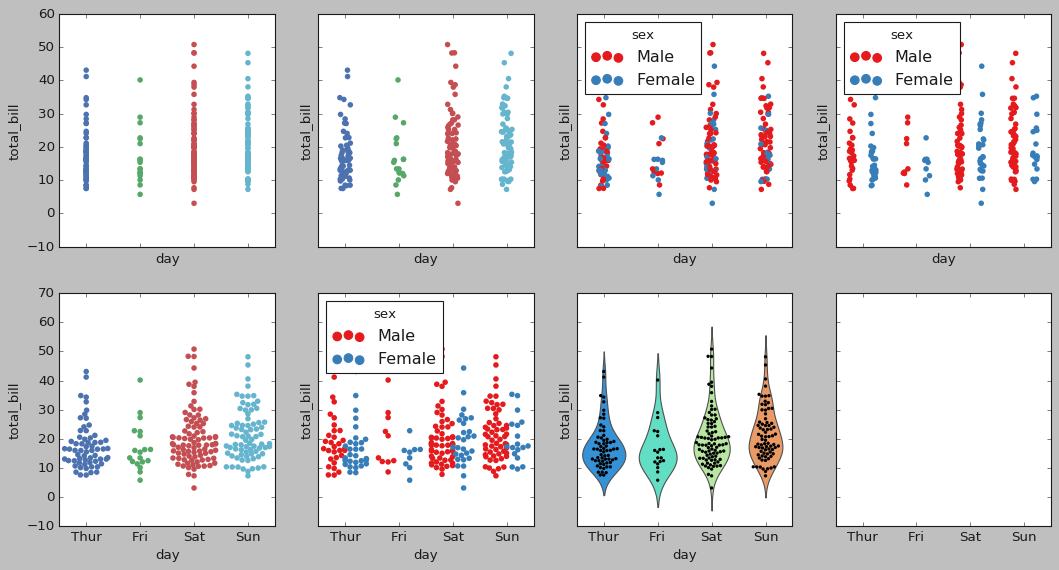

In [13]:
tips = sns.load_dataset('tips'); # print(tips.head())

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(16, 8))
# jitter when many points and they overlap:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=False, ax=ax[0,0])
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, ax=ax[0,1]) 
# hue & split
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1', ax=ax[0,2])
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True, ax=ax[0,3])
# swarmplot:
sns.swarmplot(x="day", y="total_bill", data=tips, ax=ax[1,0])
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True, ax=ax[1,1])
# violinplot + swarmplot:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow', inner=None, ax=ax[1,2]) # violinplot --> KDE
sns.swarmplot(x="day", y="total_bill", data=tips,color='black',size=3, ax=ax[1,2]);

### Matrix Plots

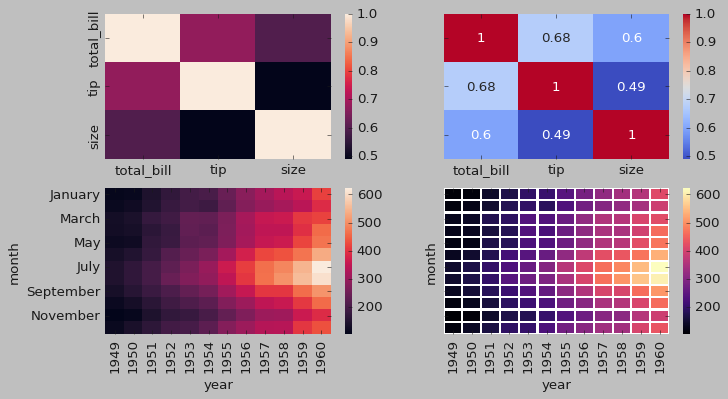

In [14]:
tips = sns.load_dataset('tips'); # print(tips.head())
flights = sns.load_dataset('flights') # print(tips.flights())
pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # print(pvflights)

fig, ax = plt.subplots(2, 2, sharey='row', figsize=(10, 5))

sns.heatmap(tips.corr(), ax=ax[0,0])
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True, ax=ax[0,1]) # annot=True prints same as: print(tips.corr()) 

sns.heatmap(pvflights, ax=ax[1,0])
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1, ax=ax[1,1]);

### clustermap

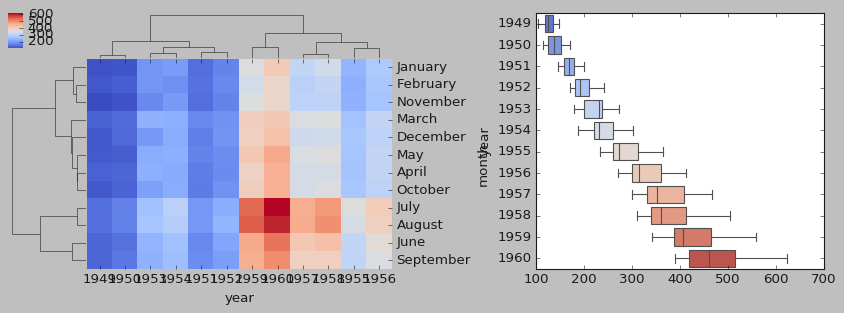

In [15]:
# clustermap in subplots:
# https://stackoverflow.com/questions/51811972/adding-seaborn-clustermap-to-figure-with-other-plots/51813562

flights = sns.load_dataset('flights') # print(tips.flights())
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
plt.style.use('classic')

g = sns.clustermap(pvflights,cmap='coolwarm', figsize=(12,4))
# set the gridspec to only cover half of the figure
g.gs.update(left=0.05, right=0.45)

#create new gridspec for the right part
import matplotlib.gridspec
gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
# create axes within this new gridspec
ax2 = g.fig.add_subplot(gs2[0])
# plot boxplot in the new axes
sns.boxplot(data=pvflights, orient="h", palette="coolwarm", ax = ax2)
plt.show()

plt.style.use('dark_background') # to see plotframe using Owl mozilla extension

/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


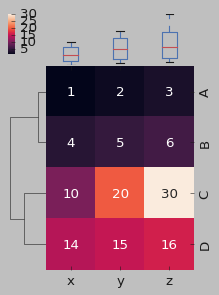

In [16]:
# https://stackoverflow.com/questions/39170455/seaborn-clustermap-within-subplot

# initiliaze a dataframe with index and column names
idf = pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6]), ('C', [10, 20, 30]), ('D', [14, 15, 16])], orient='index', columns=['x', 'y', 'z'])
plt.style.use('classic')

# Plot the clustermap which will be a figure by itself
cax = sns.clustermap(idf, col_cluster=False, row_cluster=True,annot=True , figsize=(3,4))

# Get the column dendrogram axis
cax_col_dend_ax = cax.ax_col_dendrogram.axes

# Plot the boxplot on the column dendrogram axis
# I still need to figure out how to show the axis for this boxplot
idf.plot(kind='box', ax=cax_col_dend_ax)

plt.style.use('dark_background') # to see plotframe using Owl mozilla extension
plt.show()